# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# connecting kaggle api to notebook
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
#Downloading dataset from Kaggle 
api.dataset_download_files('nikhilmittal/flight-fare-prediction-mh') 
#Path inside the brackets is — username (of_person_who_published_dataset)/name (of_the_Kaggle_dataset).

In [4]:
# downloading as zipfile and extracting the data
from zipfile import ZipFile
zf = ZipFile('flight-fare-prediction-mh.zip')
#extracted data is saved in the same directory as notebook
zf.extractall() 
zf.close()

In [5]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [7]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df=df.dropna(how='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [11]:
df.Total_Stops.dtype

dtype('O')

In [12]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [13]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
df.Destination=df.Destination.replace({'Delhi':'New Delhi','Kolkata':'Wb_Kolkata','Banglore':'Ka_Banglore'})

### Price based on Source and destination

In [16]:
df.groupby(['Source','Destination'])['Price'].mean()

Source    Destination
Banglore  New Delhi       8017.464269
Chennai   Wb_Kolkata      4789.892388
Delhi     Cochin         10540.113536
Kolkata   Ka_Banglore     9158.389411
Mumbai    Hyderabad       5059.708752
Name: Price, dtype: float64

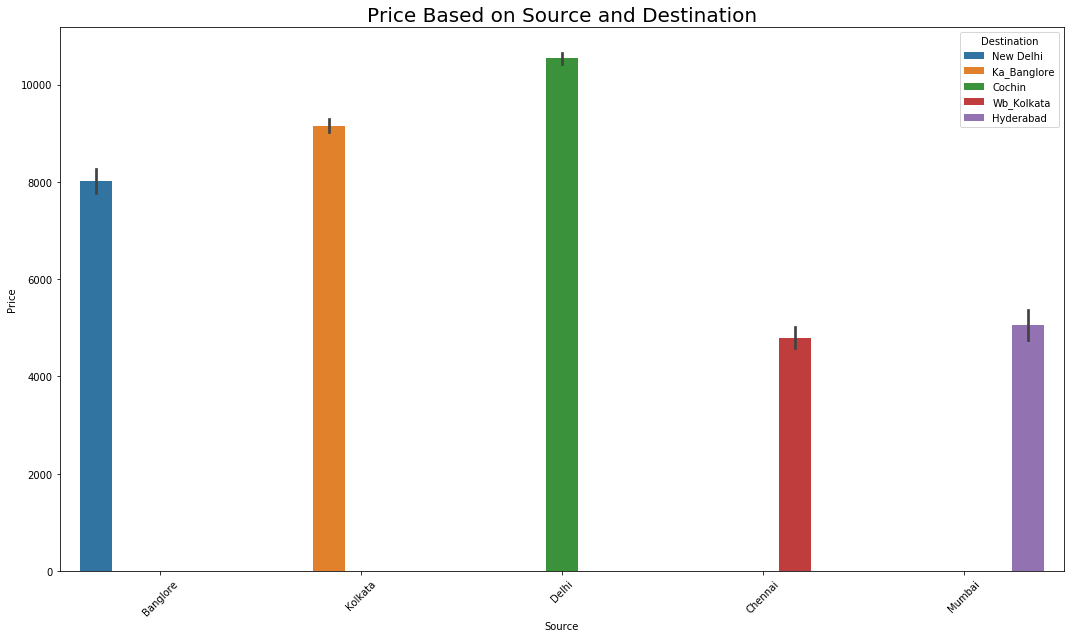

In [17]:
plt.figure(figsize=(18,10))
sns.barplot(x=df['Source'],y=df['Price'],hue=df['Destination'])
plt.title('Price Based on Source and Destination',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Price based on Airline and Duration

In [18]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

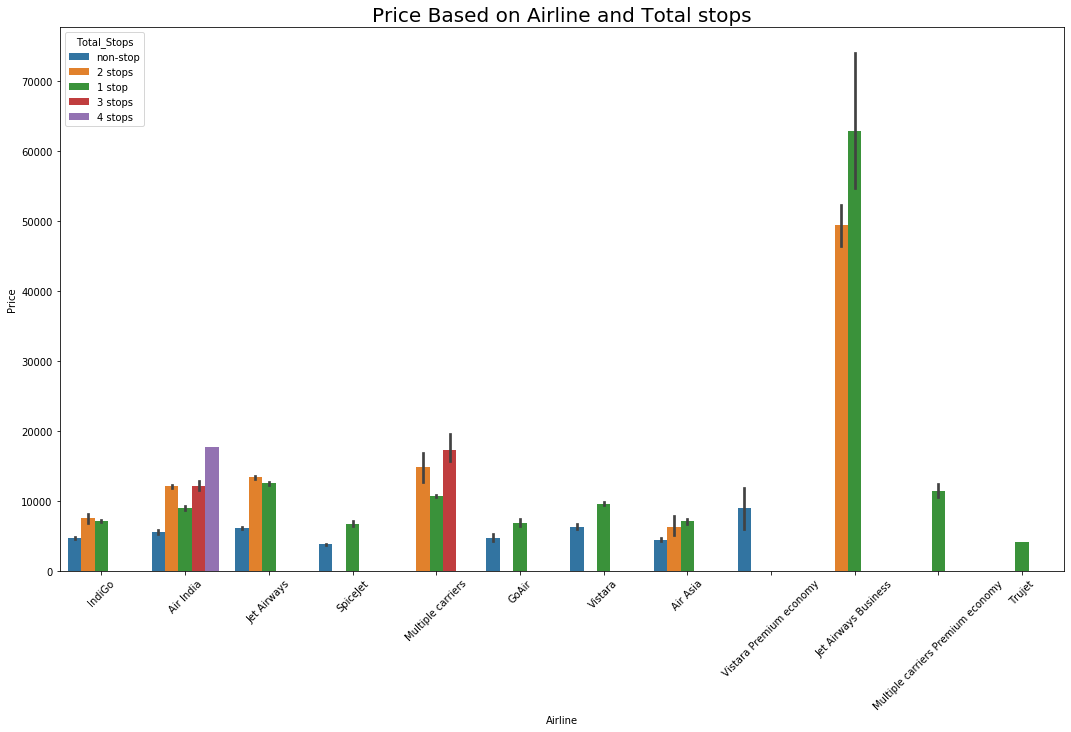

In [19]:
plt.figure(figsize=(18,10))
sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'])
plt.title('Price Based on Airline and Total stops',fontdict = {'fontsize' : 20},loc ='center', )
plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [20]:
#One hot encoding  converting categorical columns to numerical columns

Airline_dummy=pd.get_dummies(df['Airline'],drop_first=True)
Airline_dummy.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
df.Date_of_Journey.head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [22]:
df['Date']=df.Date_of_Journey.apply(lambda x: x.split('/')).apply(lambda x: x[0])
df['Date']=df.Date.astype('int64')

In [23]:
df['Month']=df.Date_of_Journey.apply(lambda x: x.split('/')).apply(lambda x: x[1])
df['Month']=df.Month.astype('int64')

In [24]:
#df.Date_of_Journey=pd.to_datetime(df.Date_of_Journey)

In [25]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month'],
      dtype='object')

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Ka_Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Ka_Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [27]:
df['Dep_Hour']=df.Dep_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df['Dep_Hour']=df['Dep_Hour'].astype('int64')

In [28]:
df['Dep_Min']=df.Dep_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df['Dep_Min']=df['Dep_Min'].astype('int64')

In [29]:

df['Duration'].head()

0    2h 50m
1    7h 25m
2       19h
3    5h 25m
4    4h 45m
Name: Duration, dtype: object

In [30]:
lst_dur=list(df['Duration'])
lst_hour=[]
lst_min=[]

In [31]:
for i in range(len(lst_dur)):
    if len(lst_dur[i].split())!=2:
        if 'h' in lst_dur[i]:
            lst_dur[i]=lst_dur[i].strip()+' 0m'
        else:
            lst_dur[i]='0h '+lst_dur[i]
        

In [32]:
lst2=[]
lst3=[]
lst1=lst_dur
for i in range(len(lst1)):
    lst1[i]=lst1[i].split(' ')
    lst1[i][0]=lst1[i][0]
    lst1[i][0]=lst1[i][0].split('h')
    lst1[i][1]=lst1[i][1].split('m')
    lst2.append(int(lst1[i][0][0]))
    lst3.append(int(lst1[i][1][0]))

df['Duration_hour']=lst2
df['Duration_min']=lst3

In [33]:
#df.Dep_Time.head()
df['Arrival_hour']=df.Arrival_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df['Arrival_hour']=df['Arrival_hour'].astype('int64')

In [34]:
df['Arrival_min']=df.Arrival_Time.apply(lambda x: x.split(':')).apply(lambda x: x[1])
df['Arrival_min']=df.Arrival_min.apply(lambda x: x.split(' ')).apply(lambda x: x[0]).astype('int64')#=df['Arrival_min'].astype('int64')
df['Arrival_min'].head()

0    10
1    15
2    25
3    30
4    35
Name: Arrival_min, dtype: int64

In [35]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [36]:
df.Destination.value_counts()

Cochin         4536
Ka_Banglore    2871
New Delhi      2197
Hyderabad       697
Wb_Kolkata      381
Name: Destination, dtype: int64

In [37]:
df.Destination.value_counts()

Cochin         4536
Ka_Banglore    2871
New Delhi      2197
Hyderabad       697
Wb_Kolkata      381
Name: Destination, dtype: int64

In [38]:
Source_dummy=pd.get_dummies(df.Source,drop_first=True) # one hot encoding
Desination_dummy=pd.get_dummies(df.Destination,drop_first=True) # one hot encoding


In [39]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
Total_Stops_dummy=pd.get_dummies(df.Total_Stops,drop_first=True) # one hot encoding

In [41]:
Total_Stops_dummy.head()

,2 stops,3 stops,4 stops,non-stop
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0


In [42]:
#df=pd.concat([Airline_dummy,Source_dummy,Desination_dummy,Total_Stops_dummy,df],axis=1)

In [43]:
df=pd.concat([Airline_dummy,Source_dummy,Desination_dummy,Total_Stops_dummy,df],axis=1)


In [44]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Hyderabad', 'Ka_Banglore', 'New Delhi',
       'Wb_Kolkata', '2 stops', '3 stops', '4 stops', 'non-stop', 'Airline',
       'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Duration_hour', 'Duration_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [45]:
df=df.drop(['Airline','Date_of_Journey', 'Source', 'Destination', 'Route','Duration','Total_Stops','Arrival_Time'],axis=1)

In [46]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Hyderabad', 'Ka_Banglore', 'New Delhi',
       'Wb_Kolkata', '2 stops', '3 stops', '4 stops', 'non-stop', 'Dep_Time',
       'Additional_Info', 'Price', 'Date', 'Month', 'Dep_Hour', 'Dep_Min',
       'Duration_hour', 'Duration_min', 'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [47]:
#df.Route.value_counts()

In [48]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [49]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [50]:
df.Additional_Info=df.Additional_Info.replace({'No Info':'No info'})

In [51]:
df.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [52]:
#df.Additional_Info=df.Additional_Info.replace({'No info':0,'In-flight meal not included':1,'No check-in baggage included':2,'1 Long layover':3,'Change airports':4,'Business class':5,'2 Long layover':6,'Red-eye flight':7,'1 Short layover':8})


In [53]:
Additional_Info_dummy=pd.get_dummies(df.Additional_Info,drop_first=True) # one hot encoding

In [54]:
df=pd.concat([Additional_Info_dummy,df],axis=1)

In [55]:
#df.Additional_Info.value_counts()
df.drop(['Additional_Info','Dep_Time'],axis=1,inplace=True)

In [56]:
df.head()

,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,No info,Red-eye flight,Air India,GoAir,...,non-stop,Price,Date,Month,Dep_Hour,Dep_Min,Duration_hour,Duration_min,Arrival_hour,Arrival_min
0,0,0,0,0,0,0,1,0,0,0,...,1,3897,24,3,22,22,2,50,1,10
1,0,0,0,0,0,0,1,0,1,0,...,0,7662,1,5,5,5,7,25,13,15
2,0,0,0,0,0,0,1,0,0,0,...,0,13882,9,6,9,9,19,0,4,25
3,0,0,0,0,0,0,1,0,0,0,...,0,6218,12,5,18,18,5,25,23,30
4,0,0,0,0,0,0,1,0,0,0,...,0,13302,1,3,16,16,4,45,21,35


In [57]:
df.columns.T

Index(['1 Short layover', '2 Long layover', 'Business class',
       'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Red-eye flight',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Hyderabad', 'Ka_Banglore', 'New Delhi',
       'Wb_Kolkata', '2 stops', '3 stops', '4 stops', 'non-stop', 'Price',
       'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Duration_hour', 'Duration_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [58]:
#df.info()

In [59]:
#X_train.corr()

In [60]:
#plt.figure(figsize=(12, 9))
#sns.heatmap(X_train.corr(),annot=True,cmap='RdYlGn');

# Test data preprocessing

In [61]:
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [62]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [64]:
df_test.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [65]:
df_test.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [66]:
df_test.Total_Stops.value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [67]:
df_test.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [68]:
#One hot encoding  converting categorical columns to numerical columns

Airline_test_dummy=pd.get_dummies(df_test['Airline'],drop_first=True) # one hot encoding
Airline_test_dummy.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [69]:
# one hot encoding
Source_test_dummy=pd.get_dummies(df_test.Source,drop_first=True)
Desination_test_dummy=pd.get_dummies(df_test.Destination,drop_first=True)
Additional_Info_test_dummy=pd.get_dummies(df_test.Additional_Info,drop_first=True)
Total_Stops_test_dummy=pd.get_dummies(df_test.Total_Stops,drop_first=True)

In [70]:
df_test=pd.concat([Airline_test_dummy,Additional_Info_test_dummy,Source_test_dummy,Desination_test_dummy,Total_Stops_test_dummy,df_test],axis=1)

In [71]:
df_test['Date']=df_test.Date_of_Journey.apply(lambda x: x.split('/')).apply(lambda x: x[0])
df_test['Date']=df_test.Date.astype('int64')

In [72]:
df_test['Month']=df_test.Date_of_Journey.apply(lambda x: x.split('/')).apply(lambda x: x[1])
df_test['Month']=df_test.Month.astype('int64')

In [73]:
df_test['Dep_Hour']=df_test.Dep_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df_test['Dep_Hour']=df_test['Dep_Hour'].astype('int64')

In [74]:
df_test['Dep_Min']=df_test.Dep_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df_test['Dep_Min']=df_test['Dep_Min'].astype('int64')

In [75]:
lst_test_dur=list(df_test['Duration'])
lst_test_hour=[]
lst_test_min=[]

In [76]:
for i in range(len(lst_test_dur)):
    if len(lst_test_dur[i].split())!=2:
        if 'h' in lst_test_dur[i]:
            lst_test_dur[i]=lst_test_dur[i].strip()+' 0m'
        else:
            lst_test_dur[i]='0h '+lst_test_dur[i]

In [77]:
lst2test_=[]
lst3test_=[]
lst1test_=lst_test_dur
for i in range(len(lst1test_)):
    lst1test_[i]=lst1test_[i].split(' ')
    lst1test_[i][0]=lst1test_[i][0]
    lst1test_[i][0]=lst1test_[i][0].split('h')
    lst1test_[i][1]=lst1test_[i][1].split('m')
    lst2test_.append(int(lst1test_[i][0][0]))
    lst3test_.append(int(lst1test_[i][1][0]))

df_test['Duration_hour']=lst2test_
df_test['Duration_min']=lst3test_

In [78]:
df_test['Arrival_hour']=df_test.Arrival_Time.apply(lambda x: x.split(':')).apply(lambda x: x[0])
df_test['Arrival_hour']=df_test['Arrival_hour'].astype('int64')

In [79]:
df_test['Arrival_min']=df_test.Arrival_Time.apply(lambda x: x.split(':')).apply(lambda x: x[1])
df_test['Arrival_min']=df_test.Arrival_min.apply(lambda x: x.split(' ')).apply(lambda x: x[0]).astype('int64')#=df['Arrival_min'].astype('int64')


In [80]:
df_test.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Business class',
       'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', '2 stops', '3 stops', '4 stops', 'non-stop', 'Airline',
       'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Date',
       'Month', 'Dep_Hour', 'Dep_Min', 'Duration_hour', 'Duration_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [81]:
df_test=df_test.drop(['Airline','Date_of_Journey', 'Source', 'Destination', 'Route','Duration','Total_Stops','Arrival_Time','Additional_Info'],axis=1)

In [82]:
df_test.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,non-stop,Dep_Time,Date,Month,Dep_Hour,Dep_Min,Duration_hour,Duration_min,Arrival_hour,Arrival_min
0,0,0,0,1,0,0,0,0,0,0,...,0,17:30,6,6,17,17,10,55,4,25
1,0,0,1,0,0,0,0,0,0,0,...,0,06:20,12,5,6,6,4,0,10,20
2,0,0,0,1,0,0,0,0,0,0,...,0,19:15,21,5,19,19,23,45,19,0
3,0,0,0,0,0,1,0,0,0,0,...,0,08:00,21,5,8,8,13,0,21,0
4,0,0,0,0,0,0,0,0,0,0,...,1,23:55,24,6,23,23,2,50,2,45


In [83]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [84]:
X.columns

Index(['1 Short layover', '2 Long layover', 'Business class',
       'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Red-eye flight',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Hyderabad', 'Ka_Banglore', 'New Delhi',
       'Wb_Kolkata', '2 stops', '3 stops', '4 stops', 'non-stop', 'Date',
       'Month', 'Dep_Hour', 'Dep_Min', 'Duration_hour', 'Duration_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

In [85]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [86]:
df_test.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Business class',
       'Change airports', 'In-flight meal not included',
       'No check-in baggage included', 'No info', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', '2 stops', '3 stops', '4 stops', 'non-stop', 'Dep_Time',
       'Date', 'Month', 'Dep_Hour', 'Dep_Min', 'Duration_hour', 'Duration_min',
       'Arrival_hour', 'Arrival_min'],
      dtype='object')

### Splitting the dataset

In [87]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
r2_scores=[]

## Linear Regression

In [89]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [90]:
y_pred_lin_reg=lin_reg.predict(X_test)
r2_scores.append(('LinearRegression',r2_score(y_test,y_pred_lin_reg)))

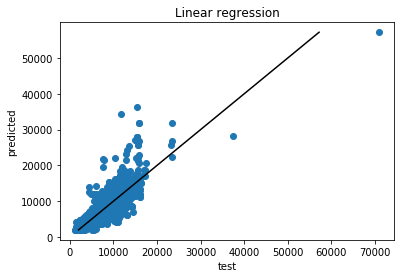

In [91]:
plt.scatter(y_pred_lin_reg,y_test)
plt.title('Linear regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

## Random Forest Regression

In [92]:
rdf=RandomForestRegressor()


In [93]:
rdf.fit(X_train,y_train)

RandomForestRegressor()

In [94]:
y_pred_rdf=rdf.predict(X_test)
print(r2_score(y_test,y_pred_rdf))
r2_scores.append(('RandomForestRegressor',r2_score(y_test,y_pred_rdf)))

0.8718478111277497


### Feature Imporatance Random Forest Regression

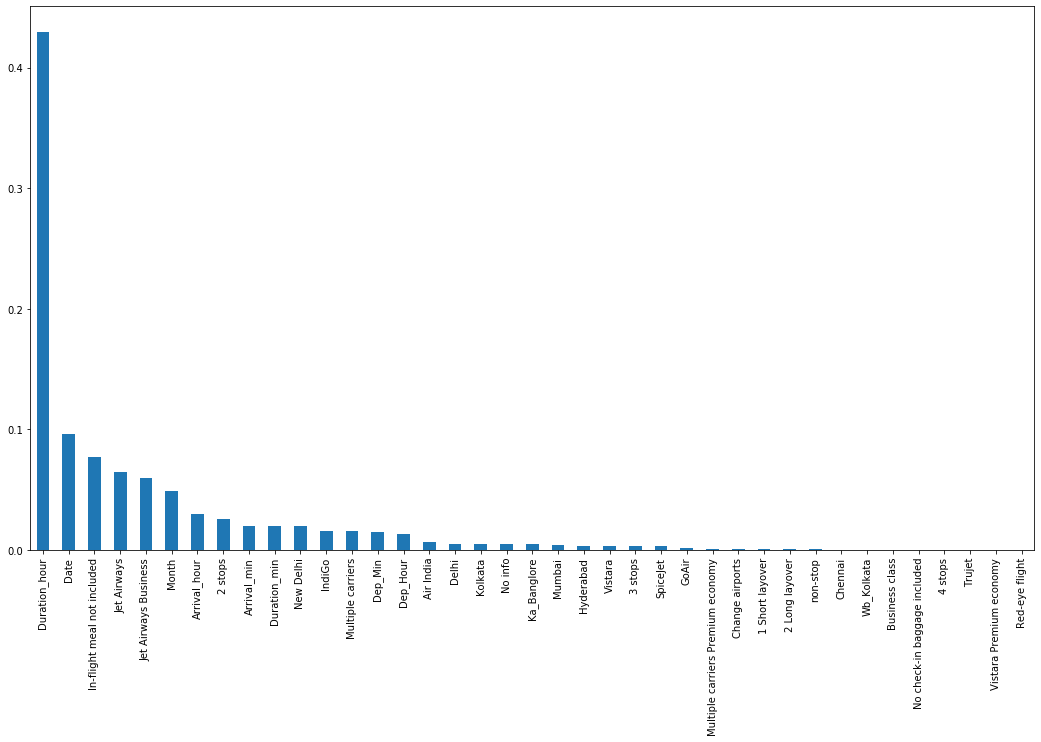

In [95]:
pd.Series(rdf.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10));

## Extra Tree Regression

In [96]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
extr=ExtraTreesRegressor()
extr.fit(X_train,y_train)
y_pred_extr=extr.predict(X_test)


from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred_extr))
r2_scores.append(('ExtraTreesRegressor',r2_score(y_test,y_pred_extr)))


0.9133293485801457


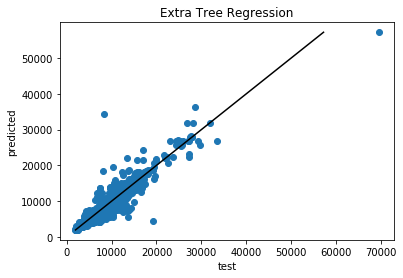

In [97]:
plt.scatter(y_pred_extr,y_test)
plt.title('Extra Tree Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

### Feature Imporatance Extra Tree Regression

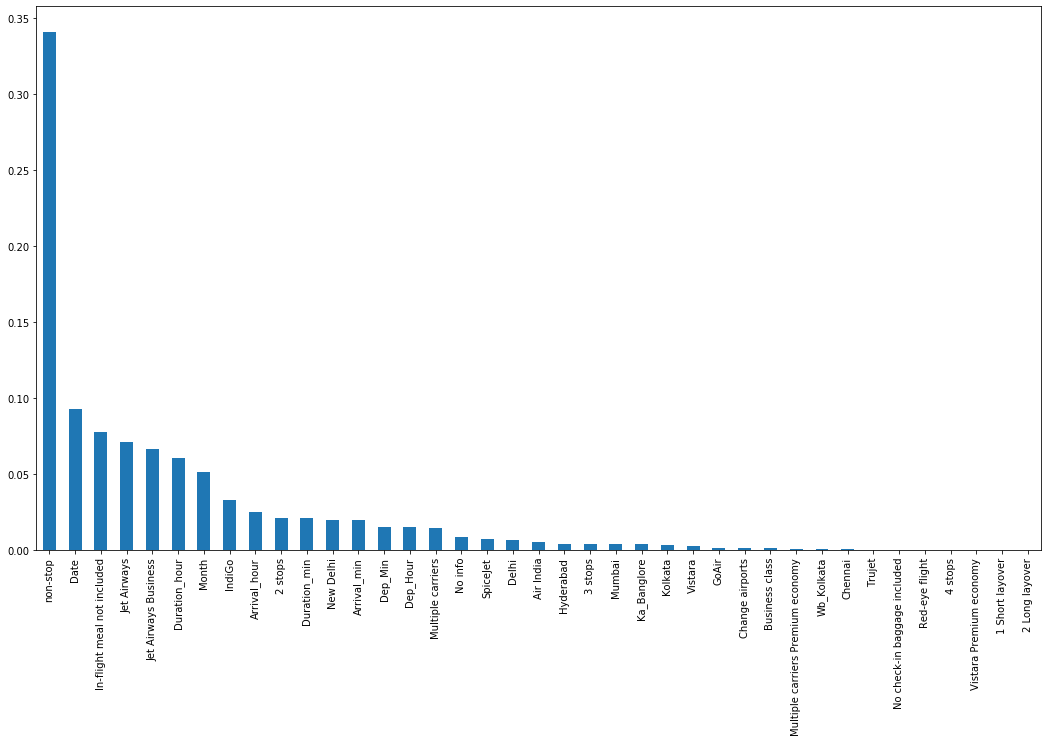

In [98]:
pd.Series(extr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10));

## CatBoost Regression

In [99]:
#!pip install catboost

In [100]:
from catboost import CatBoostRegressor

cbr=CatBoostRegressor()
cbr.fit(X_train,y_train)
y_pred_cbr=cbr.predict(X_test)
print(r2_score(y_test,y_pred_cbr))
r2_scores.append(('CatBoostRegressor',r2_score(y_test,y_pred_cbr)))

Learning rate set to 0.05718
0:	learn: 4449.5702375	total: 149ms	remaining: 2m 29s
1:	learn: 4285.5820498	total: 158ms	remaining: 1m 19s
2:	learn: 4143.4676831	total: 164ms	remaining: 54.4s
3:	learn: 4008.8694516	total: 168ms	remaining: 41.8s
4:	learn: 3894.2682093	total: 172ms	remaining: 34.2s
5:	learn: 3778.2537400	total: 177ms	remaining: 29.3s
6:	learn: 3672.7048917	total: 179ms	remaining: 25.4s
7:	learn: 3573.2518414	total: 182ms	remaining: 22.6s
8:	learn: 3477.8522665	total: 185ms	remaining: 20.4s
9:	learn: 3387.8309722	total: 188ms	remaining: 18.6s
10:	learn: 3300.5746540	total: 191ms	remaining: 17.1s
11:	learn: 3227.3822787	total: 194ms	remaining: 16s
12:	learn: 3158.6996142	total: 196ms	remaining: 14.9s
13:	learn: 3091.5624061	total: 199ms	remaining: 14s
14:	learn: 3033.5227337	total: 202ms	remaining: 13.3s
15:	learn: 2978.1366894	total: 205ms	remaining: 12.6s
16:	learn: 2937.0656263	total: 208ms	remaining: 12s
17:	learn: 2891.4655682	total: 210ms	remaining: 11.4s
18:	learn: 28

151:	learn: 1815.0871282	total: 599ms	remaining: 3.34s
152:	learn: 1812.2380115	total: 602ms	remaining: 3.33s
153:	learn: 1812.0044931	total: 604ms	remaining: 3.32s
154:	learn: 1810.7901729	total: 606ms	remaining: 3.3s
155:	learn: 1808.5708347	total: 608ms	remaining: 3.29s
156:	learn: 1805.1890487	total: 611ms	remaining: 3.28s
157:	learn: 1804.9254255	total: 613ms	remaining: 3.26s
158:	learn: 1803.0106363	total: 615ms	remaining: 3.25s
159:	learn: 1799.3293334	total: 618ms	remaining: 3.24s
160:	learn: 1797.1867015	total: 620ms	remaining: 3.23s
161:	learn: 1796.3078408	total: 622ms	remaining: 3.21s
162:	learn: 1793.6606034	total: 624ms	remaining: 3.2s
163:	learn: 1793.0281765	total: 626ms	remaining: 3.19s
164:	learn: 1790.6797610	total: 629ms	remaining: 3.18s
165:	learn: 1790.1303832	total: 630ms	remaining: 3.17s
166:	learn: 1789.4533209	total: 633ms	remaining: 3.15s
167:	learn: 1788.6527127	total: 635ms	remaining: 3.14s
168:	learn: 1787.8041368	total: 637ms	remaining: 3.13s
169:	learn: 

301:	learn: 1584.7065661	total: 936ms	remaining: 2.16s
302:	learn: 1583.3605507	total: 938ms	remaining: 2.16s
303:	learn: 1581.9772913	total: 941ms	remaining: 2.15s
304:	learn: 1580.2281092	total: 944ms	remaining: 2.15s
305:	learn: 1578.6599822	total: 947ms	remaining: 2.15s
306:	learn: 1577.9370081	total: 950ms	remaining: 2.15s
307:	learn: 1576.8185629	total: 959ms	remaining: 2.15s
308:	learn: 1576.7735146	total: 961ms	remaining: 2.15s
309:	learn: 1575.7302736	total: 964ms	remaining: 2.15s
310:	learn: 1573.5082707	total: 970ms	remaining: 2.15s
311:	learn: 1573.4399606	total: 973ms	remaining: 2.14s
312:	learn: 1573.3966361	total: 975ms	remaining: 2.14s
313:	learn: 1572.1170385	total: 978ms	remaining: 2.14s
314:	learn: 1570.5699508	total: 981ms	remaining: 2.13s
315:	learn: 1570.5278206	total: 983ms	remaining: 2.13s
316:	learn: 1568.9112915	total: 988ms	remaining: 2.13s
317:	learn: 1568.8700868	total: 990ms	remaining: 2.12s
318:	learn: 1568.8300555	total: 992ms	remaining: 2.12s
319:	learn

451:	learn: 1427.8531460	total: 1.33s	remaining: 1.62s
452:	learn: 1427.6699138	total: 1.34s	remaining: 1.61s
453:	learn: 1427.2038982	total: 1.34s	remaining: 1.61s
454:	learn: 1427.0294698	total: 1.34s	remaining: 1.6s
455:	learn: 1425.7174144	total: 1.34s	remaining: 1.6s
456:	learn: 1424.3216670	total: 1.34s	remaining: 1.6s
457:	learn: 1424.3044945	total: 1.35s	remaining: 1.59s
458:	learn: 1423.5360995	total: 1.35s	remaining: 1.59s
459:	learn: 1422.9456806	total: 1.35s	remaining: 1.59s
460:	learn: 1422.7836579	total: 1.35s	remaining: 1.58s
461:	learn: 1420.4548567	total: 1.36s	remaining: 1.58s
462:	learn: 1418.1431160	total: 1.36s	remaining: 1.58s
463:	learn: 1417.9058243	total: 1.36s	remaining: 1.57s
464:	learn: 1415.7793916	total: 1.36s	remaining: 1.57s
465:	learn: 1413.6608046	total: 1.37s	remaining: 1.57s
466:	learn: 1411.5503015	total: 1.37s	remaining: 1.56s
467:	learn: 1409.9945276	total: 1.37s	remaining: 1.56s
468:	learn: 1408.8298201	total: 1.38s	remaining: 1.56s
469:	learn: 1

601:	learn: 1319.4951710	total: 1.69s	remaining: 1.11s
602:	learn: 1318.8692254	total: 1.69s	remaining: 1.11s
603:	learn: 1318.2692242	total: 1.69s	remaining: 1.11s
604:	learn: 1317.3194092	total: 1.69s	remaining: 1.11s
605:	learn: 1316.3966314	total: 1.7s	remaining: 1.1s
606:	learn: 1315.2031923	total: 1.7s	remaining: 1.1s
607:	learn: 1314.1817739	total: 1.7s	remaining: 1.1s
608:	learn: 1312.8855252	total: 1.7s	remaining: 1.09s
609:	learn: 1312.1530423	total: 1.71s	remaining: 1.09s
610:	learn: 1311.2959866	total: 1.71s	remaining: 1.09s
611:	learn: 1310.0170706	total: 1.71s	remaining: 1.08s
612:	learn: 1309.6376978	total: 1.72s	remaining: 1.08s
613:	learn: 1308.7148859	total: 1.72s	remaining: 1.08s
614:	learn: 1307.5168569	total: 1.72s	remaining: 1.08s
615:	learn: 1307.5065275	total: 1.72s	remaining: 1.07s
616:	learn: 1306.8155127	total: 1.73s	remaining: 1.07s
617:	learn: 1306.0065847	total: 1.73s	remaining: 1.07s
618:	learn: 1305.0743706	total: 1.73s	remaining: 1.07s
619:	learn: 1304.

751:	learn: 1220.0563785	total: 2.08s	remaining: 685ms
752:	learn: 1219.2186501	total: 2.08s	remaining: 682ms
753:	learn: 1218.8809557	total: 2.08s	remaining: 679ms
754:	learn: 1218.4806948	total: 2.08s	remaining: 676ms
755:	learn: 1218.1347331	total: 2.09s	remaining: 674ms
756:	learn: 1217.2995544	total: 2.09s	remaining: 671ms
757:	learn: 1216.7482570	total: 2.09s	remaining: 668ms
758:	learn: 1216.2812085	total: 2.1s	remaining: 666ms
759:	learn: 1216.0561346	total: 2.1s	remaining: 663ms
760:	learn: 1215.7070706	total: 2.1s	remaining: 660ms
761:	learn: 1214.7778826	total: 2.1s	remaining: 658ms
762:	learn: 1214.1518595	total: 2.11s	remaining: 655ms
763:	learn: 1213.8999895	total: 2.11s	remaining: 652ms
764:	learn: 1213.4938051	total: 2.11s	remaining: 649ms
765:	learn: 1213.0461508	total: 2.12s	remaining: 647ms
766:	learn: 1211.9757987	total: 2.12s	remaining: 643ms
767:	learn: 1211.3812964	total: 2.12s	remaining: 641ms
768:	learn: 1210.7153494	total: 2.12s	remaining: 638ms
769:	learn: 12

901:	learn: 1155.8256388	total: 2.47s	remaining: 268ms
902:	learn: 1155.3310935	total: 2.47s	remaining: 265ms
903:	learn: 1154.8181343	total: 2.48s	remaining: 263ms
904:	learn: 1154.3828067	total: 2.48s	remaining: 260ms
905:	learn: 1154.0621120	total: 2.48s	remaining: 258ms
906:	learn: 1154.0587528	total: 2.48s	remaining: 255ms
907:	learn: 1153.6818793	total: 2.49s	remaining: 252ms
908:	learn: 1153.1625447	total: 2.49s	remaining: 249ms
909:	learn: 1153.0597293	total: 2.49s	remaining: 246ms
910:	learn: 1153.0564581	total: 2.49s	remaining: 244ms
911:	learn: 1152.7237765	total: 2.5s	remaining: 241ms
912:	learn: 1152.7205801	total: 2.5s	remaining: 238ms
913:	learn: 1152.2114808	total: 2.5s	remaining: 236ms
914:	learn: 1151.3937788	total: 2.51s	remaining: 233ms
915:	learn: 1150.8010272	total: 2.51s	remaining: 230ms
916:	learn: 1150.1223542	total: 2.51s	remaining: 227ms
917:	learn: 1149.6888188	total: 2.51s	remaining: 225ms
918:	learn: 1149.6855615	total: 2.52s	remaining: 222ms
919:	learn: 1

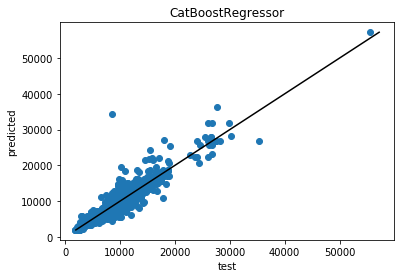

In [101]:
plt.scatter(y_pred_cbr,y_test)
plt.title('CatBoostRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

### Feature Imporatance CatBoost Regression

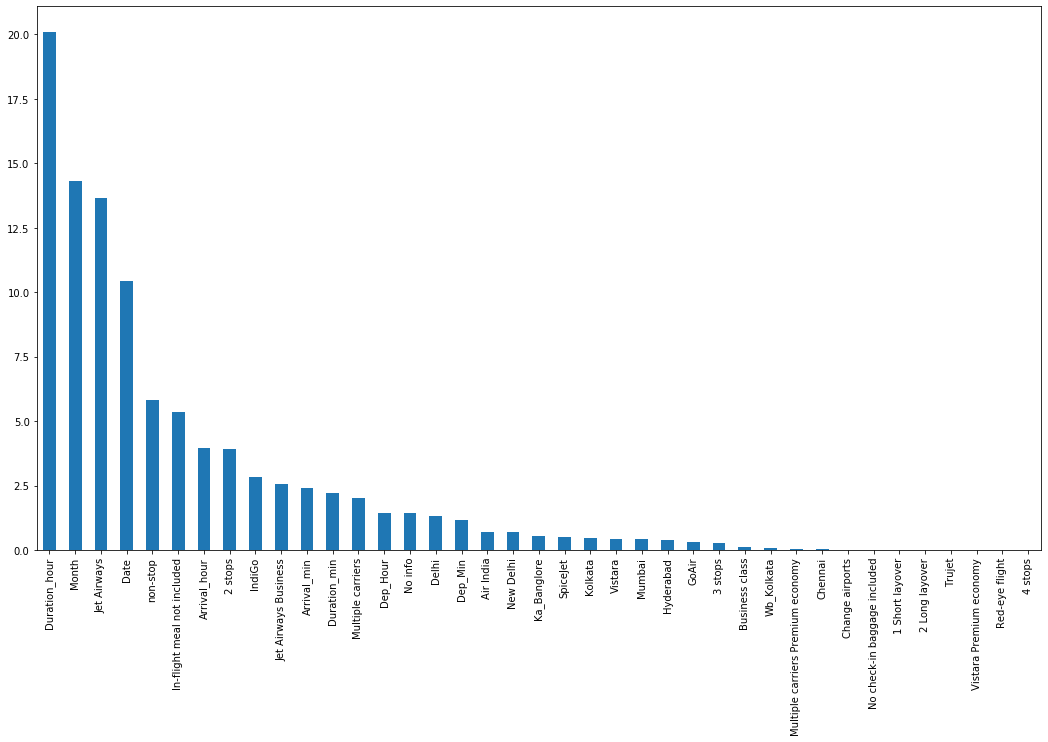

In [102]:
pd.Series(cbr.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10));

## XGBoost Regression

In [103]:
#!pip install xgboost

In [104]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)
print(r2_score(y_test,y_pred_xgb))
r2_scores.append(('XGBRegressor',r2_score(y_test,y_pred_xgb)))

0.9143923021114007


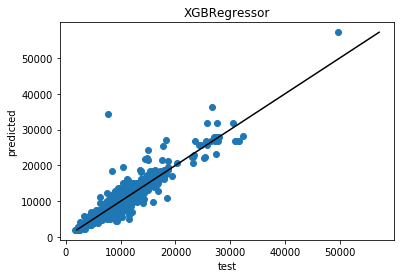

In [105]:
plt.scatter(y_pred_xgb,y_test)
plt.title('XGBRegressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('test')
plt.ylabel('predicted')
plt.show()

### Feature Imporatance XGBoost Regression

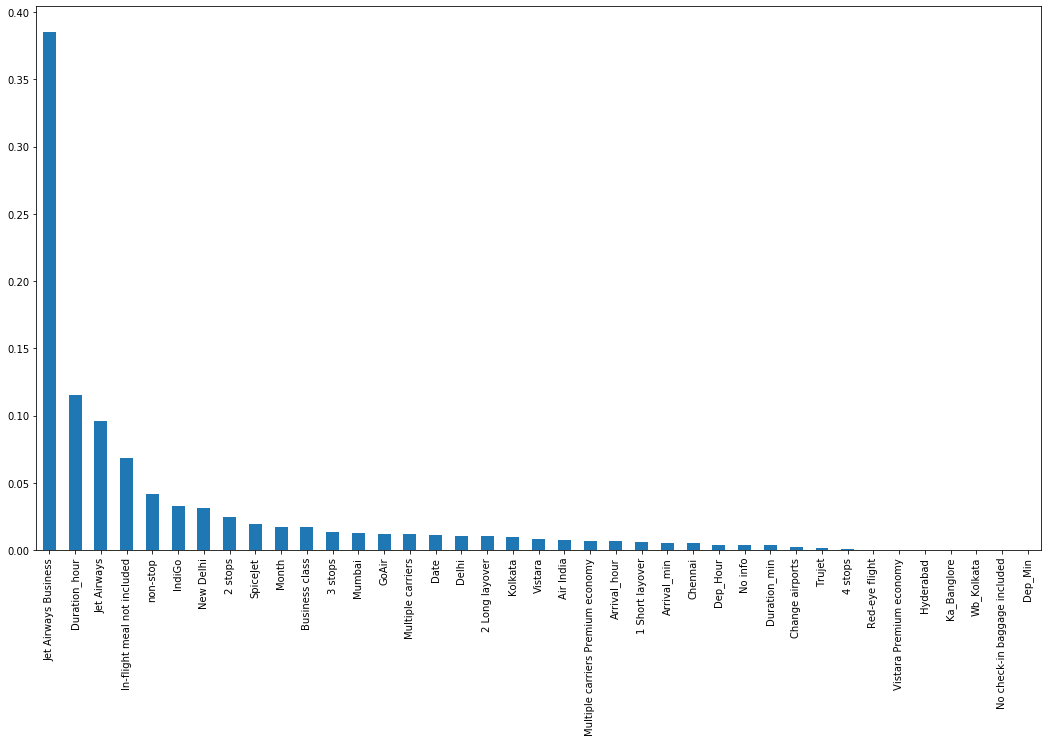

In [106]:
pd.Series(xgb_model.feature_importances_,index=X.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10));

In [107]:
r2_scores

[('LinearRegression', 0.6838299618248773),
 ('RandomForestRegressor', 0.8718478111277497),
 ('ExtraTreesRegressor', 0.9133293485801457),
 ('CatBoostRegressor', 0.9068562832420274),
 ('XGBRegressor', 0.9143923021114007)]

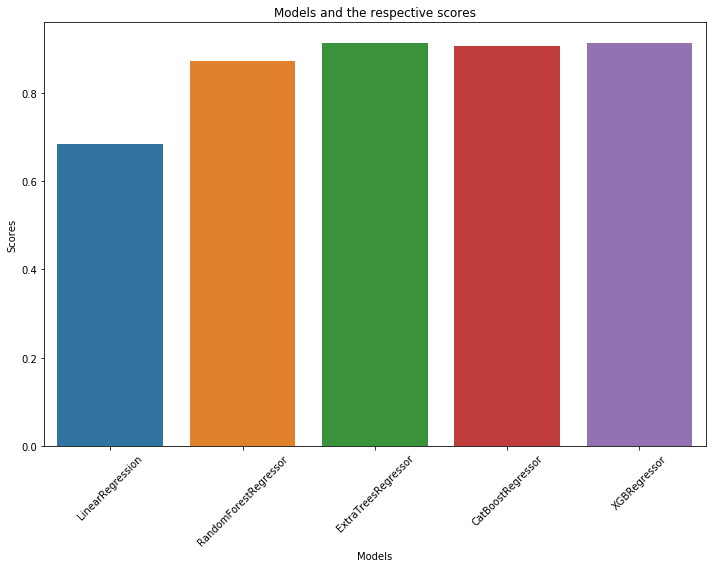

In [108]:
#plotting barplot
df1= pd.DataFrame(r2_scores,columns =['Models', 'Scores']) 
plt.figure(figsize=(10,8))
sns.barplot(x=df1['Models'],y=df1['Scores'])
plt.xticks(rotation=45)

plt.title('Models and the respective scores' )
plt.tight_layout()
plt.show()


In [109]:
df.to_csv('flight_pred_df')

In [110]:
import pickle 
# Saving model to disk
pickle.dump(xgb_model, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))